# Objetivo

En este trabajo se analizará un dataset con información proveniente del negocio Superstore, intentando obtener insights sobre los datos recabados del desempeño de la tienda en el período que abarca entre los años 2011-2014.

Se busca analizar los datos en busca de plantear preguntas e hipótesis que nos permitan comprender el rendimiento de las variables del conjunto de datos y sus posibles correlaciones para alcanzar insights de valor para nuevas estrategias de negocio que maximicen las ventas y el retorno de ganancias.

In [69]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:/Users/ariel/Desktop/Ari/data_science/datasets/Superstore.xlsx")

df.head(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


# Preguntas e hipótesis

**H1 -** *¿Cómo se comporta la variable "Ventas" en relación con las variables "Segmento de cliente", "Región" y "Categoría de producto"?*
   
**H2 -** *Las "Regiones" con más "Pedidos" son las que presentan mayor ingreso por "Ventas".*

**H3 -** *A mayor cantidad de "Pedidos" en cada "Categoría de producto", mayor ingreso por "Ventas".*

**H4 -** *Los "Descuentos" incentivan la "Cantidad de productos vendidos" por "Pedido".*

**H5 -** *¿Cuál es la distribución de "Ganancia" por "Región" segmentada por "Categoría de producto"?*

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub_Category   9994 n

In [23]:
df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [72]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2013-06-27 00:00:00,2013-06-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


# H1 - ¿Cómo se comporta la variable "Ventas" en relación con las variables "Segmento de cliente", "Región" y "Categoría de producto"?

In [119]:
data_porc_ventas_clientes=df[['Sales','Segment']].groupby(by='Segment').sum()
data_porc_ventas_region=df[['Sales','Region']].groupby(by='Region').sum()
data_porc_ventas_categoria=df[['Sales','Category']].groupby(by='Category').sum()
data_porc_ventas['Sales'] = data_porc_ventas['Sales'].astype(int)
data_porc_ventas

,Sales
Segment,
Consumer,1161401
Corporate,706146
Home Office,429653


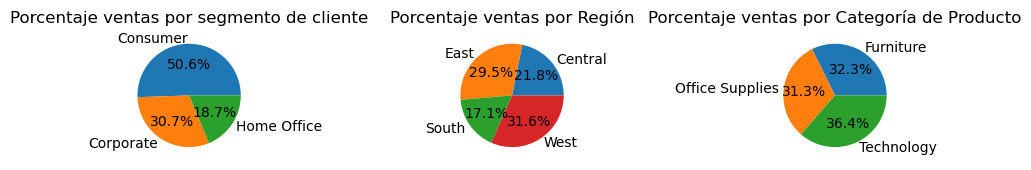

In [120]:
fig,axs = plt.subplots(1, 3, figsize =(10, 6))
axs[0].pie(data_porc_ventas_clientes.Sales, labels = data_porc_ventas_clientes.index, autopct='%1.1f%%');
axs[1].pie(data_porc_ventas_region.Sales, labels = data_porc_ventas_region.index, autopct='%1.1f%%');
axs[2].pie(data_porc_ventas_categoria.Sales, labels = data_porc_ventas_categoria.index, autopct='%1.1f%%');

axs[0].set_title('Porcentaje ventas por segmento de cliente')
axs[1].set_title('Porcentaje ventas por Región')
axs[2].set_title('Porcentaje ventas por Categoría de Producto')

plt.subplots_adjust(wspace=1.5)  

En estos gráficos podemos analizar la variable "Ventas" en relación con las variables "Segmento de Cliente", observando que el segmento de "Consumidor" representa el mayor porcentaje del total de ventas; "Región", siendo la Oeste la que obtuvo mayor porcentaje de ventas; y "Categoría de producto" , en dónde "Tecnología" fue la que mayor porcentaje del total de ventas representó.

# H2 - Las regiones con más pedidos son las que presentan mayor ingreso por ventas.

In [44]:
H2= df.groupby('Region').agg(total_pedidos=('Order_ID', 'count'), total_ventas=('Sales', 'sum')).reset_index()
H2['total_ventas'] = H2['total_ventas'].astype(int)
H2

,Region,total_pedidos,total_ventas
0,Central,2323,501239
1,East,2848,678781
2,South,1620,391721
3,West,3203,725457


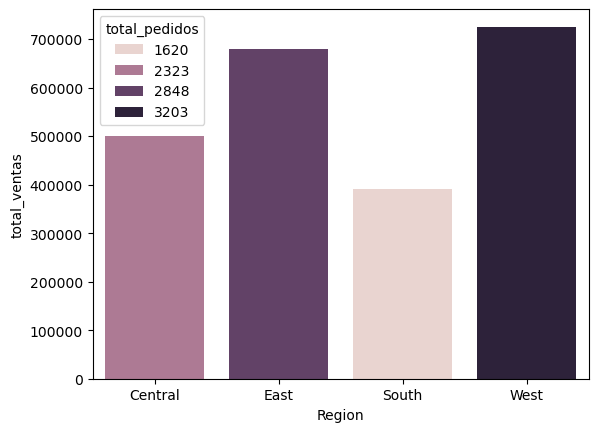

In [39]:
sns.barplot(x='Region',y='total_ventas',hue='total_pedidos', data=H2);

Con este gráfico podemos aseverar que efectivamente las regiones con mayores ordenes de pedidos han acumulado un mayor ingreso por ventas.

# H3 - A mayor cantidad de productos vendidos en cada categoría de producto, mayor ingreso por ventas.

In [43]:
H3= df.groupby('Category').agg(total_productos=('Quantity', 'sum'), total_ventas=('Sales', 'sum')).reset_index()
H3['total_ventas'] = H3['total_ventas'].astype(int)
H3

,Category,total_productos,total_ventas
0,Furniture,8028,741999
1,Office Supplies,22906,719047
2,Technology,6939,836154


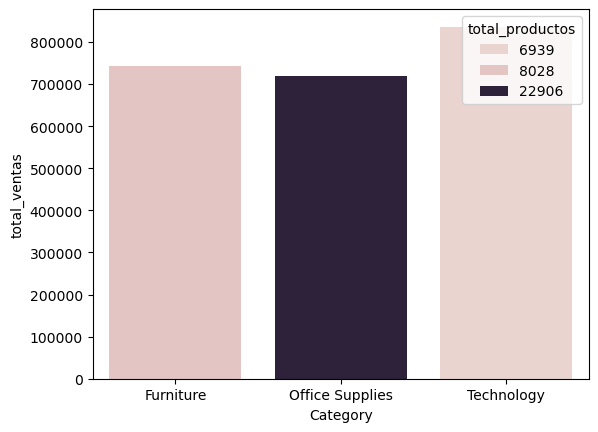

In [45]:
sns.barplot(x='Category',y='total_ventas',hue='total_productos', data=H3);

Con este gráfico confirmamos que no se verifica de forma verdadera la hipótesis que correlaciona ingresos con cantidad de productos vendidos, ya que el segmento "Tecnología", presenta una menor cantidad de productos vendidos y mayor acumulación de ingresos por ventas. 

# H4 - Los "Descuentos" incentivan la "Cantidad de productos vendidos".

In [134]:
print('Cantidad promedio de productos por pedido: ',df['Quantity'].mean().round(2))
print('Mediana de descuento: ', df['Discount'].median())

Cantidad promedio de productos por pedido:  3.79
Mediana de descuento:  0.2


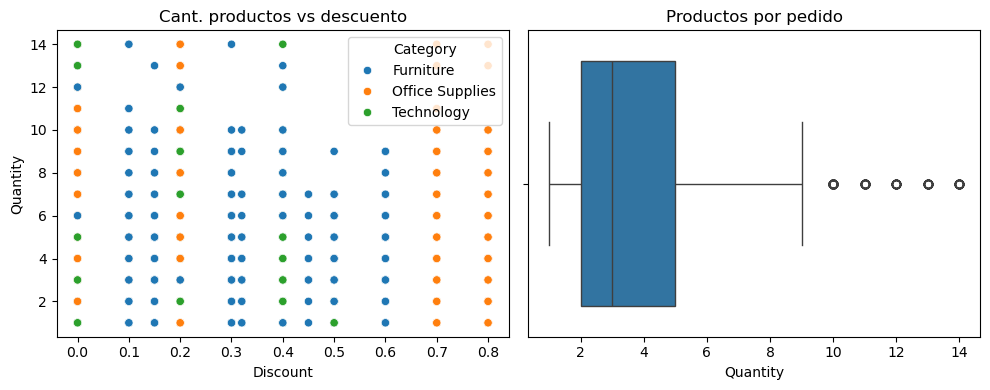

In [122]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))


sns.scatterplot(data=df, x="Discount", y="Quantity", hue="Category", ax=axes[0])
sns.boxplot(data=df, x="Quantity", ax=axes[1])

axes[0].set_title('Cant. productos vs descuento')
axes[1].set_title('Productos por pedido')

plt.tight_layout()

plt.show()

En la observación que nos proveen estos gráficos no se aprecia una correlación entre el aumento en el porcentaje de "Descuento" y el aumento en "Cantidad de productos" vendidos, por lo que la hipótesis no se confirma.

# H5 - ¿Cuál es la distribución de "Ganancia" por "Región" segmentada por "Categoría de producto"?

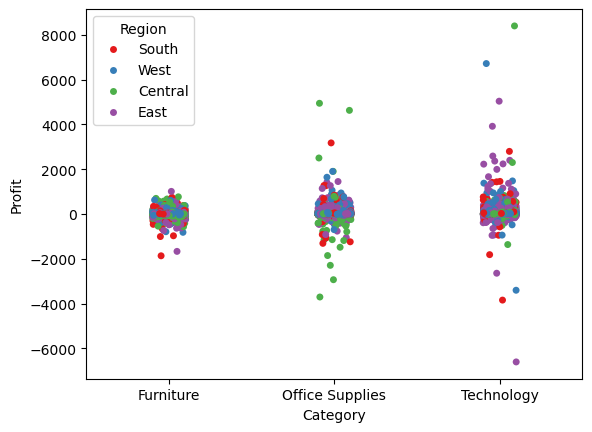

In [27]:
sns.stripplot(x="Category", y="Profit", data=df,jitter=True,hue='Region',palette='Set1');

En este gráfico podemos observar el margen de rentabilidad/perdida que existe por categoría de producto, destacando las categorías según su mayor amplitud/concentración, al tiempo que se identifican las regiones donde se produce el fenómeno.